In [12]:
# 导入数据分析库pandas，官方文档https://pandas.pydata.org/docs/
import pandas as pd

# 从本地导入数据
df = pd.read_csv('C:\\Users\\mazhen\\Desktop\\sh000001.csv')
# 查看数据
df.head()

,time,open,close,high,low,volume,money
0,2020/5/7 9:31,2876.47,2873.08,2876.47,2872.78,907288,0
1,2020/5/7 9:32,2872.75,2869.95,2872.75,2869.95,410307,0
2,2020/5/7 9:33,2870.31,2870.28,2871.27,2869.56,391156,0
3,2020/5/7 9:34,2870.67,2871.66,2872.34,2870.67,364079,0
4,2020/5/7 9:35,2871.68,2872.11,2872.11,2871.38,355139,0


In [13]:
# 取出时间
raw_time = pd.to_datetime(df.pop('time'), format='%Y/%m/%d %H:%M')

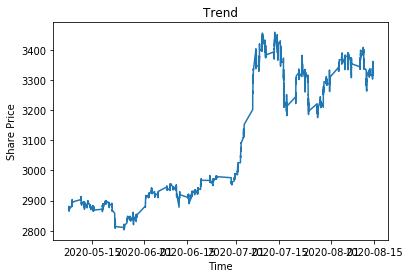

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns

# 折线图：股票走势
plt.plot(raw_time, df['close'])
plt.xlabel('Time')
plt.ylabel('Share Price')
plt.title('Trend')
plt.show()

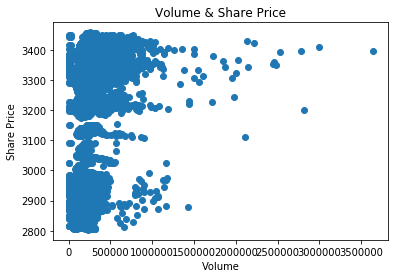

In [16]:
# 散点图：成交量和股价

plt.scatter(df['volume'], df['close'])
plt.xlabel('Volume')
plt.ylabel('Share Price')
plt.title('Volume & Share Price')
plt.show()

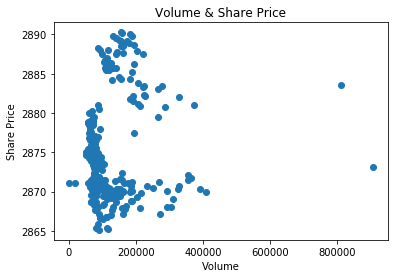

In [17]:
plt.scatter(df['volume'][:300], df['close'][:300])  # 切片，取前300组数据
plt.xlabel('Volume')
plt.ylabel('Share Price')
plt.title('Volume & Share Price')
plt.show()

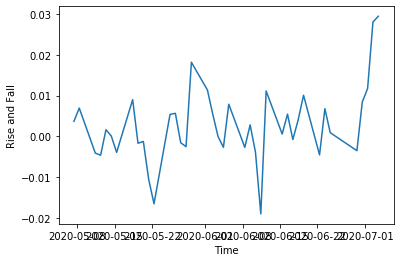

In [18]:
# 涨跌幅度
daily_return = df['close'][0::240].pct_change().dropna()
plt.plot(raw_time[0::240][:40], daily_return[:40])
plt.xlabel('Time')
plt.ylabel('Rise and Fall')
plt.show()

(array([ 1.,  3.,  4., 28., 21.,  7.,  4.,  0.,  0.,  1.]),
 array([-0.03890164, -0.02889666, -0.01889167, -0.00888669,  0.0011183 ,
         0.01112328,  0.02112826,  0.03113325,  0.04113823,  0.05114322,
         0.0611482 ]),
 <a list of 10 Patch objects>)

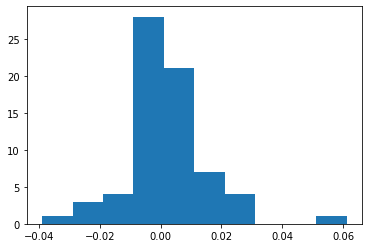

In [19]:
# 直方图
plt.hist(daily_return)

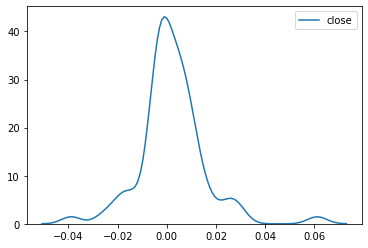

In [20]:
# 核密度估计
sns.kdeplot(daily_return)

In [21]:
# 相关系数矩阵
correlation = df.corr()
print(correlation)

            open     close      high       low    volume  money
open    1.000000  0.999970  0.999989  0.999989  0.414392    NaN
close   0.999970  1.000000  0.999989  0.999989  0.414456    NaN
high    0.999989  0.999989  1.000000  0.999987  0.415657    NaN
low     0.999989  0.999989  0.999987  1.000000  0.413202    NaN
volume  0.414392  0.414456  0.415657  0.413202  1.000000    NaN
money        NaN       NaN       NaN       NaN       NaN    NaN


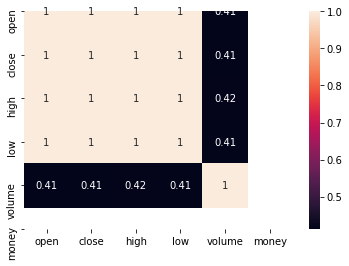

In [22]:
sns.heatmap(correlation, annot=True)